# **Market Timing Strategies using Kalman Filter**

*WorldQuant University, Msc Financial Engineering*

*author: rakeshsharma.pr@gmail.com*


# **Introduction**

In this section, I will explore the implementation of a Kalman filter in Python using the library Pykalman to forecast stock prices. The 2 stocks we are targeting are Ethereum and Bitcoin. As discussed in the literature review, research shows that Kalman filters have better outcomes for time series forecasting and can be used with various pricing algorithms, such as Heston, Bates, etc.

In [67]:
# installation of libraries

!pip install pykalman
!pip install plotly
!pip install statsmodels

In [68]:
# importing of libraries

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

# **Exploratory Data Analysis**

In [69]:
# crypto currencies of interest - Bitcoin and Ethereum

stock_list = ['BTC-USD', 'ETH-USD']

In [70]:
# extracting the stock price for the last 2 years
data = yf.download(stock_list, start='2022-09-01', end='2024-08-31')
data.head()

[*********************100%***********************]  2 of 2 completed


Price                         Adj Close                      Close  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  20127.140625  1586.176758  20127.140625   
2022-09-02 00:00:00+00:00  19969.771484  1577.220459  19969.771484   
2022-09-03 00:00:00+00:00  19832.087891  1556.872681  19832.087891   
2022-09-04 00:00:00+00:00  19986.712891  1577.641602  19986.712891   
2022-09-05 00:00:00+00:00  19812.371094  1617.183228  19812.371094   

Price                                           High               \
Ticker                         ETH-USD       BTC-USD      ETH-USD   
Date                                                                
2022-09-01 00:00:00+00:00  1586.176758  20198.390625  1593.082764   
2022-09-02 00:00:00+00:00  1577.220459  20401.568359  1643.183228   
2022-09-03 00:00:00+00:00  1556.872681  20037.009766  1579.454346   
2022-09-04 00:00:00+00:00  1577.641602  19999.689453  1578.009277   
2022-09-05 00:00:00+00:00  1617.183228  20031.160156  1621.661377   

Price                               Low                       Open  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  19653.968750  1520.188354  20050.498047   
2022-09-02 00:00:00+00:00  19814.765625  1551.877930  20126.072266   
2022-09-03 00:00:00+00:00  19698.355469  1541.672119  19969.718750   
2022-09-04 00:00:00+00:00  19636.816406  1543.698853  19832.470703   
2022-09-05 00:00:00+00:00  19673.046875  1559.781860  19988.789062   

Price                                        Volume               
Ticker                         ETH-USD      BTC-USD      ETH-USD  
Date                                                              
2022-09-01 00:00:00+00:00  1553.756348  30182031010  16434276817  
2022-09-02 00:00:00+00:00  1586.017944  29123998928  17708478709  
2022-09-03 00:00:00+00:00  1577.213745  23613051457   9516825994  
2022-09-04 00:00:00+00:00  1556.895874  25245861652   8884144998  
2022-09-05 00:00:00+00:00  1577.884033  28813460025  13060541168

In [71]:
data.describe()

Price      Adj Close                      Close                       High  \
Ticker       BTC-USD      ETH-USD       BTC-USD      ETH-USD       BTC-USD   
count     730.000000   730.000000    730.000000   730.000000    730.000000   
mean    37518.319863  2154.649833  37518.319863  2154.649833  38162.137949   
std     17685.270401   760.858790  17685.270401   760.858790  18083.910703   
min     15787.284180  1100.169800  15787.284180  1100.169800  16253.047852   
25%     23665.855469  1620.496521  23665.855469  1620.496521  24119.581543   
50%     29412.204102  1866.100159  29412.204102  1866.100159  29845.836914   
75%     55988.014648  2640.965576  55988.014648  2640.965576  57679.622070   
max     73083.500000  4066.445068  73083.500000  4066.445068  73750.070312   

Price                         Low                       Open               \
Ticker      ETH-USD       BTC-USD      ETH-USD       BTC-USD      ETH-USD   
count    730.000000    730.000000   730.000000    730.000000   730.000000   
mean    2197.880829  36780.942348  2107.257615  37464.146091  2153.339377   
std      781.196683  17220.739292   736.665024  17678.426052   761.057358   
min     1136.442627  15599.046875  1081.138184  15782.300781  1100.107178   
25%     1644.864014  23253.754883  1580.678528  23627.717285  1617.854645   
50%     1887.949524  29113.966797  1845.784241  29403.917969  1865.844604   
75%     2709.429199  54234.083008  2585.498413  55644.687500  2640.590576   
max     4092.284180  71334.093750  3936.627197  73079.375000  4066.690430   

Price         Volume                
Ticker       BTC-USD       ETH-USD  
count   7.300000e+02  7.300000e+02  
mean    2.494924e+10  1.111478e+10  
std     1.410581e+10  6.917282e+09  
min     5.331173e+09  2.081626e+09  
25%     1.473525e+10  6.289494e+09  
50%     2.165289e+10  9.412596e+09  
75%     3.145988e+10  1.414162e+10  
max     1.189925e+11  6.766813e+10

The data shows that open, close, High,low are correlated, we can check this in our plot

In [72]:
data.corr().style.background_gradient(cmap='coolwarm')

In [73]:
data.isnull().any()

Price      Ticker 
Adj Close  BTC-USD    False
           ETH-USD    False
Close      BTC-USD    False
           ETH-USD    False
High       BTC-USD    False
           ETH-USD    False
Low        BTC-USD    False
           ETH-USD    False
Open       BTC-USD    False
           ETH-USD    False
Volume     BTC-USD    False
           ETH-USD    False
dtype: bool

The dataset do not contain any null values

In [74]:
closing_data = data['Adj Close']['BTC-USD']
closing_data.head()

,BTC-USD
Date,
2022-09-01 00:00:00+00:00,20127.140625
2022-09-02 00:00:00+00:00,19969.771484
2022-09-03 00:00:00+00:00,19832.087891
2022-09-04 00:00:00+00:00,19986.712891
2022-09-05 00:00:00+00:00,19812.371094


In [75]:
closing_data = data['Adj Close']['ETH-USD']
closing_data.head()

,ETH-USD
Date,
2022-09-01 00:00:00+00:00,1586.176758
2022-09-02 00:00:00+00:00,1577.220459
2022-09-03 00:00:00+00:00,1556.872681
2022-09-04 00:00:00+00:00,1577.641602
2022-09-05 00:00:00+00:00,1617.183228


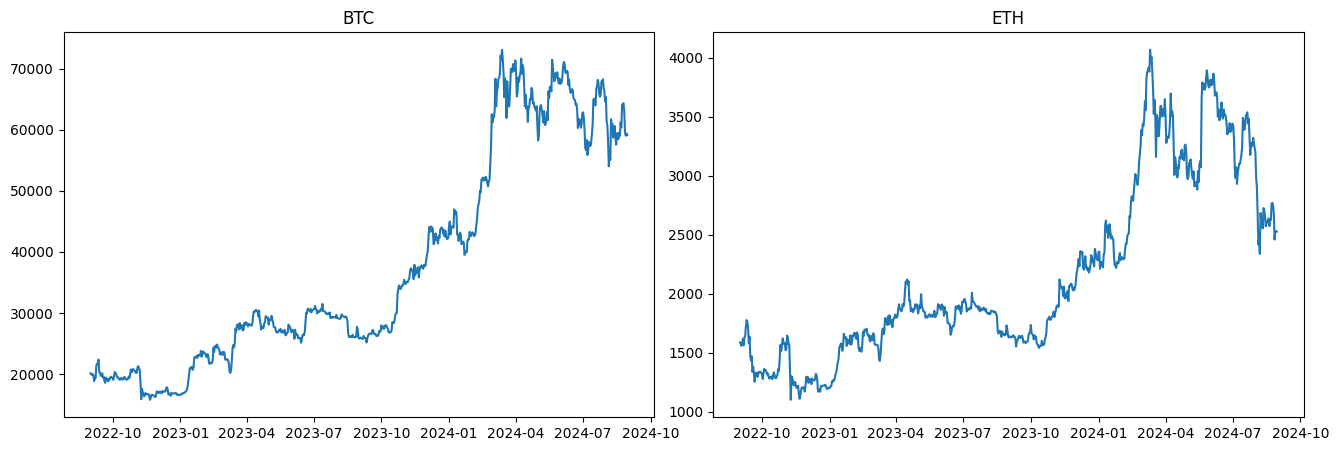

In [76]:
fig, axs =plt.subplots(1,2,figsize=(16, 5),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(data['Adj Close']['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(data['Adj Close']['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

(-0.5, 0.5)

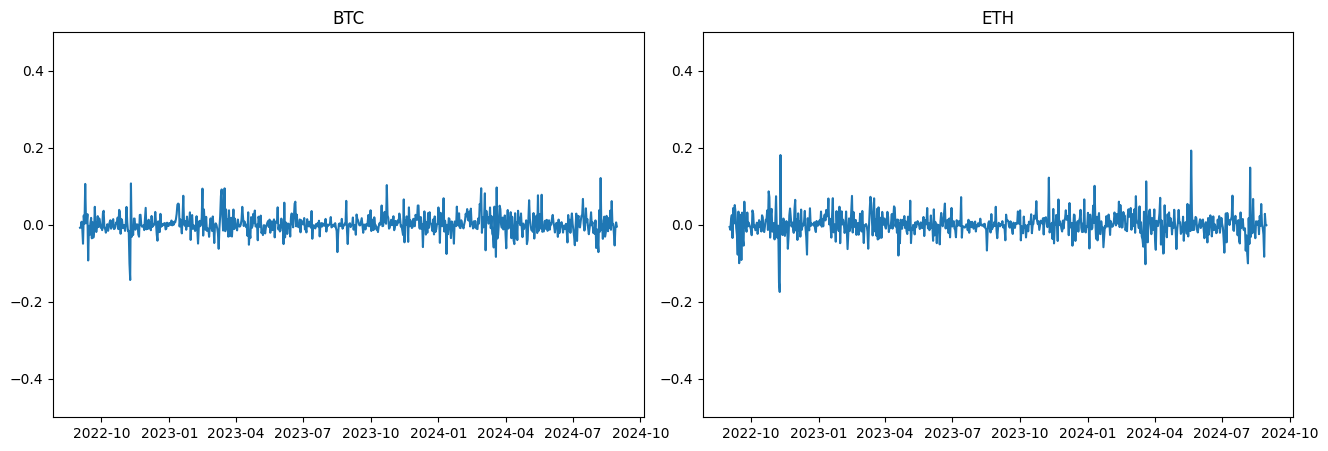

In [77]:

fig, axs = plt.subplots(1,2,figsize=(16,5),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
btc = data['Adj Close']['BTC-USD'].pct_change().dropna(axis=0)
axs[0].plot(btc)
axs[0].set_title('BTC')
axs[0].set_ylim([-0.5,0.5])

eth = data['Adj Close']['ETH-USD'].pct_change().dropna(axis=0)
axs[1].plot(eth)
axs[1].set_title('ETH')
axs[1].set_ylim([-0.5,0.5])

**OHLC plots - Price movements**
A candle stick plot helps us understand the spread between the prices of the crypto currency from the opening and closing price and identity the periods where they were coninuously on the rise.

In [78]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['BTC-USD'], high=data['High']['BTC-USD'],
                low=data['Low']['BTC-USD'], close=data['Close']['BTC-USD'])
                     ])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [79]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['ETH-USD'], high=data['High']['ETH-USD'],
                low=data['Low']['ETH-USD'], close=data['Close']['ETH-USD'])
                     ])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

**Understanding the Price shocks**

We can see how the rolling mean for various intervals looks like for our crypto data, we find that with increasing window size our data gets smoother and allows us to see the trend over which can be used for generating feature engineering. The shorter the window closer it is to the actual stock price and considers the price shocks.

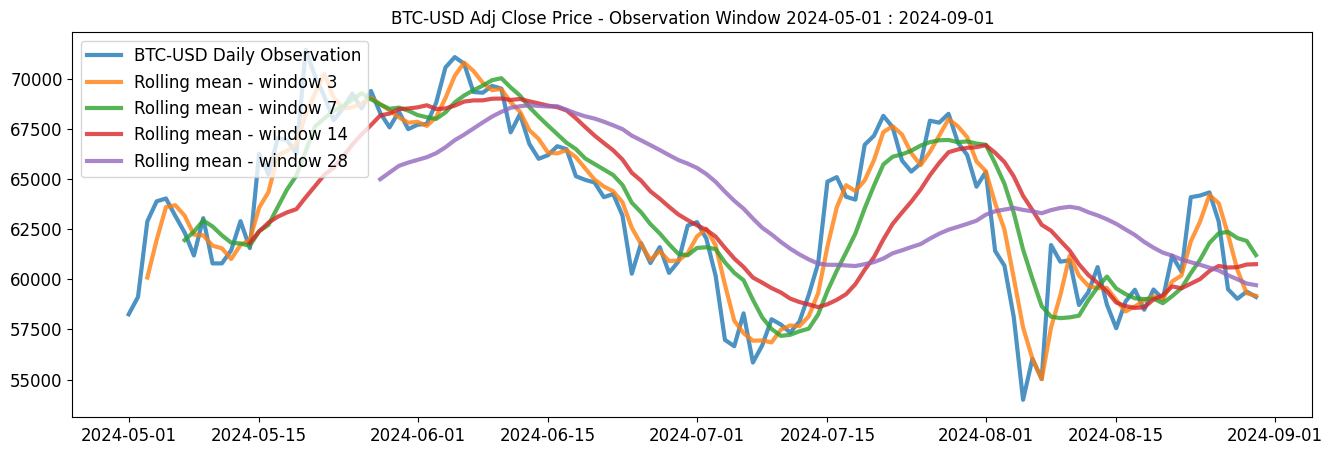

In [80]:
btc_closing_data = data['Adj Close']['BTC-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 5))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('BTC-USD Adj Close Price - Observation Window 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

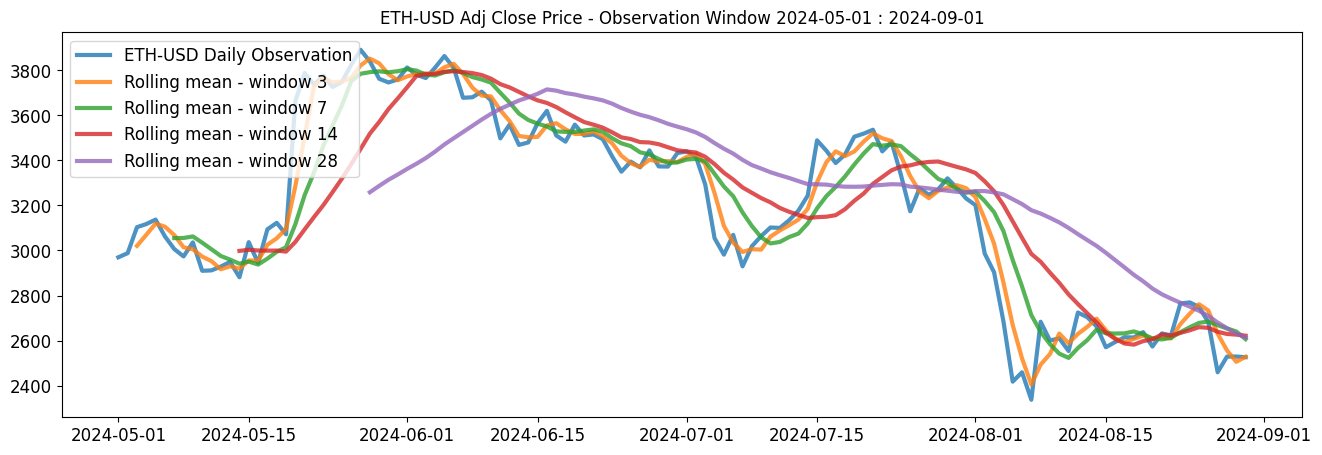

In [81]:
eth_closing_data = data['Adj Close']['ETH-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = eth_closing_data.rolling(window=3).mean()
rolling_7d = eth_closing_data.rolling(window=7).mean()
rolling_14d = eth_closing_data.rolling(window=14).mean()
rolling_28d = eth_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 5))
plt.plot(eth_closing_data.index, eth_closing_data, lw=3, alpha=0.8, label='ETH-USD Daily Observation')
plt.plot(eth_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(eth_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(eth_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(eth_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('ETH-USD Adj Close Price - Observation Window 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Ethereum rolling means are lot steeper than BTC, in the further sections we will do the causality tests to see autocorrelation.

**Understanding the Volume Shocks**

Positive volume shocks can be leveraged to improve returns and it is signifcant for volume based trading in crypto. Trading strategists can buy stocks on a positive volume jump and sell stocks on volume downsides to make profit over a period of time. A shock is defined as the increase or decrease in the volume comapred to the 12-month average.
Compared to the rolling mean for 28 days, daily volume shows significant upward spikes compared to downfalls.

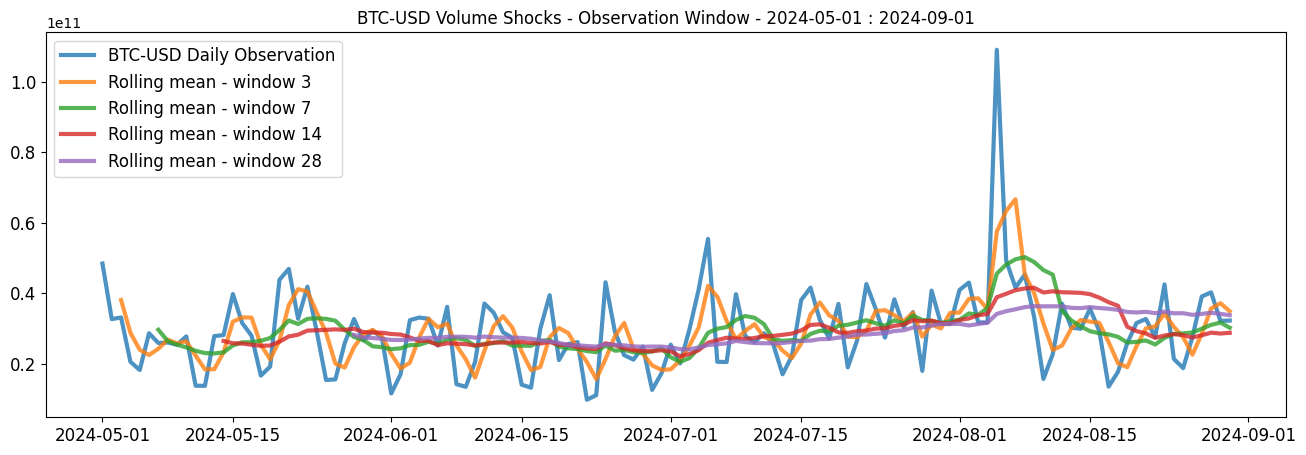

In [82]:
btc_closing_data = data['Volume']['BTC-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 5))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('BTC-USD Volume Shocks - Observation Window - 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

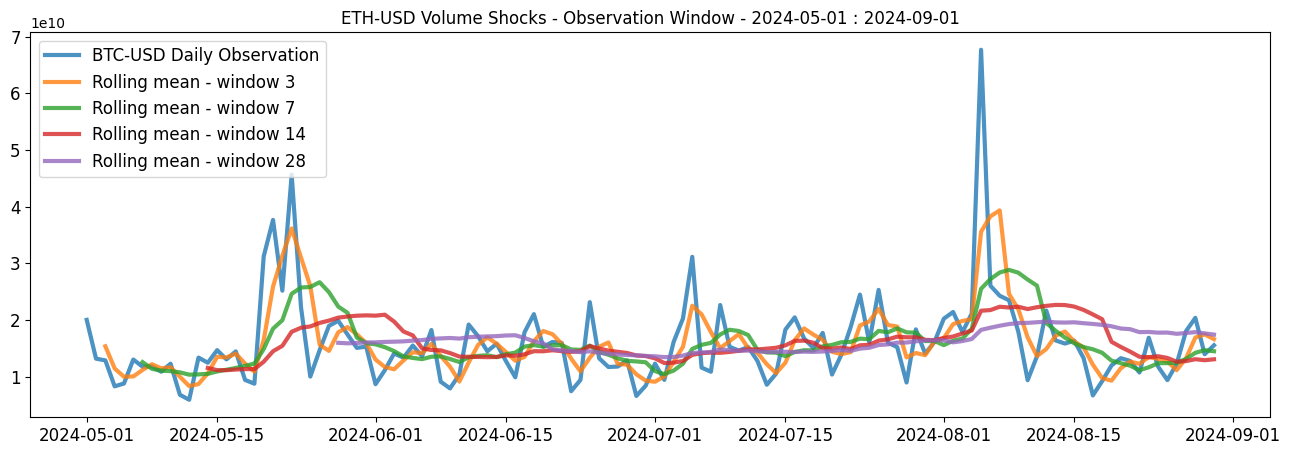

In [83]:
btc_closing_data = data['Volume']['ETH-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 5))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('ETH-USD Volume Shocks - Observation Window - 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Check for Autocorrelation and Partial autocorrelation**

In the below section we can check for ACF and PACF functions for 'Adjusted Closing Price'

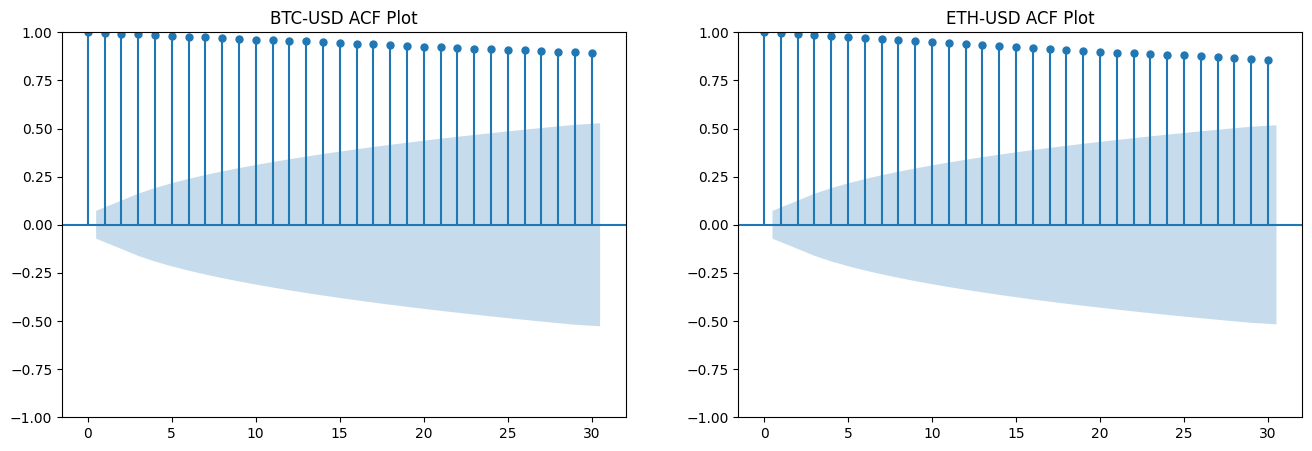

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Adj Close']['BTC-USD']
sm.graphics.tsa.plot_acf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD ACF Plot")

eth_data = data['Adj Close']['ETH-USD']
sm.graphics.tsa.plot_acf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD ACF Plot")
plt.show()

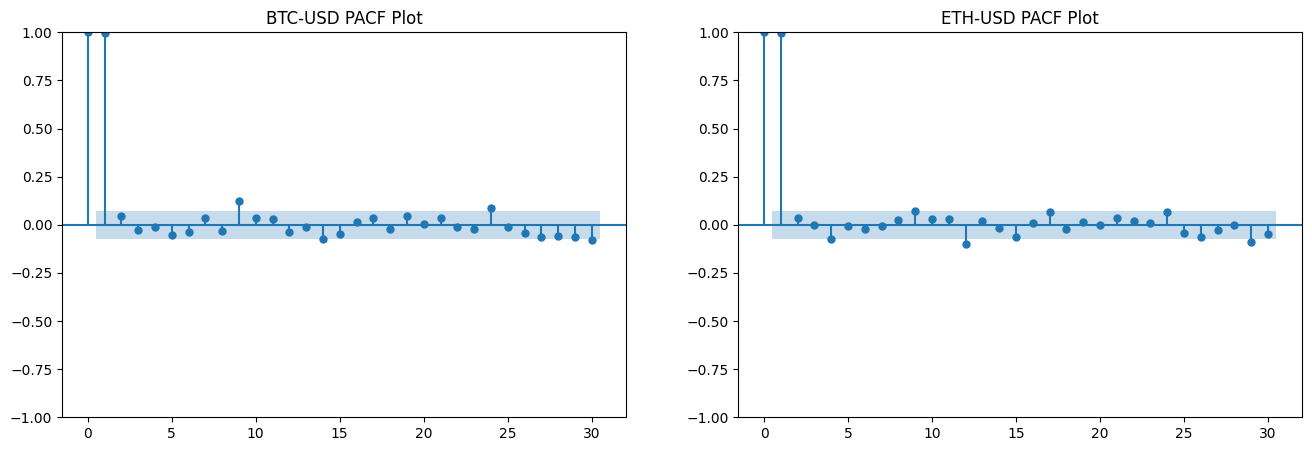

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Adj Close']['BTC-USD']
sm.graphics.tsa.plot_pacf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD PACF Plot")

eth_data = data['Adj Close']['ETH-USD']
sm.graphics.tsa.plot_pacf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD PACF Plot")
plt.show()

The plot shows significant autocorrelation, the previous value of the currenty determines days closing price. From the PACF plot it is clear that price of certain period of time is correlated than others, say for example price on day 4, 9, 12, 15 etc.

In the next sections we will test for trend and autocorrelatioins for Volume in both crypto currencies.

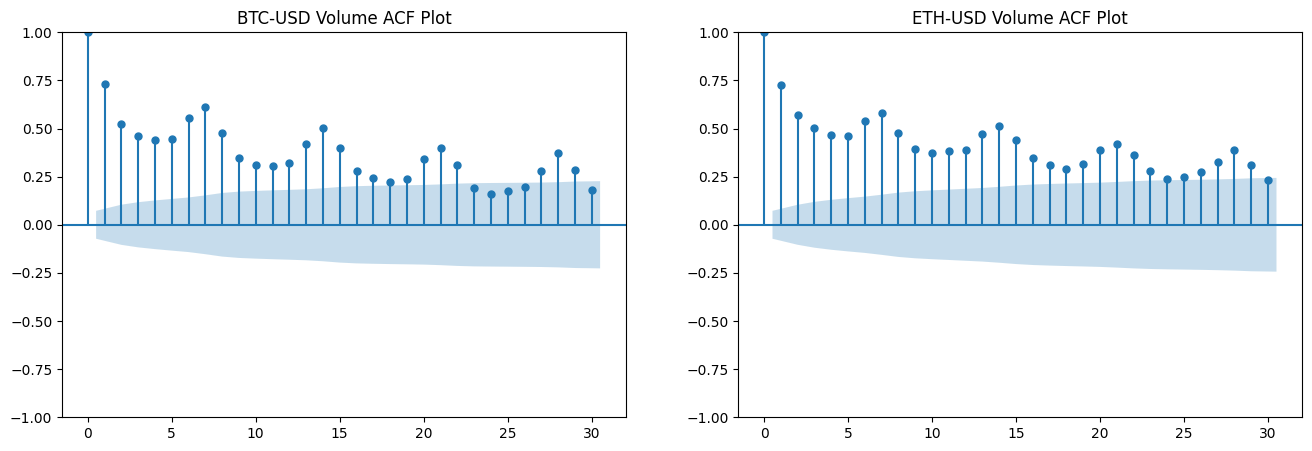

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Volume']['BTC-USD']
sm.graphics.tsa.plot_acf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD Volume ACF Plot")

eth_data = data['Volume']['ETH-USD']
sm.graphics.tsa.plot_acf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD Volume ACF Plot")
plt.show()

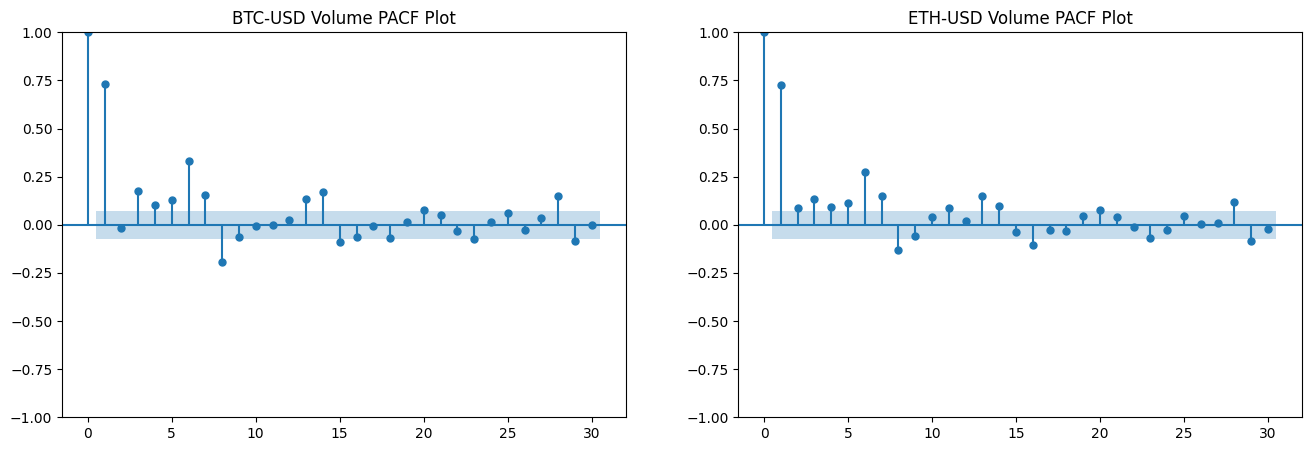

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Volume']['BTC-USD']
sm.graphics.tsa.plot_pacf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD Volume PACF Plot")

eth_data = data['Volume']['ETH-USD']
sm.graphics.tsa.plot_pacf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD Volume PACF Plot")
plt.show()

# **Exploring Kalman Filter**

Getting started with Kalman Filters for the data, we will be using the algorithms implementation in pykalman. Let us do the Kalman smoothing and filtering methods to remove the trend here. Stock price by nature is very noisy and with an underlying trend. The identification of this trend can be useful in many ways and can also be used as a feature for stock price forecasting using ARIMA, Linear Regression or any other methods.

In [88]:
# initializing kalman filters

from pykalman import KalmanFilter
import numpy as np


kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

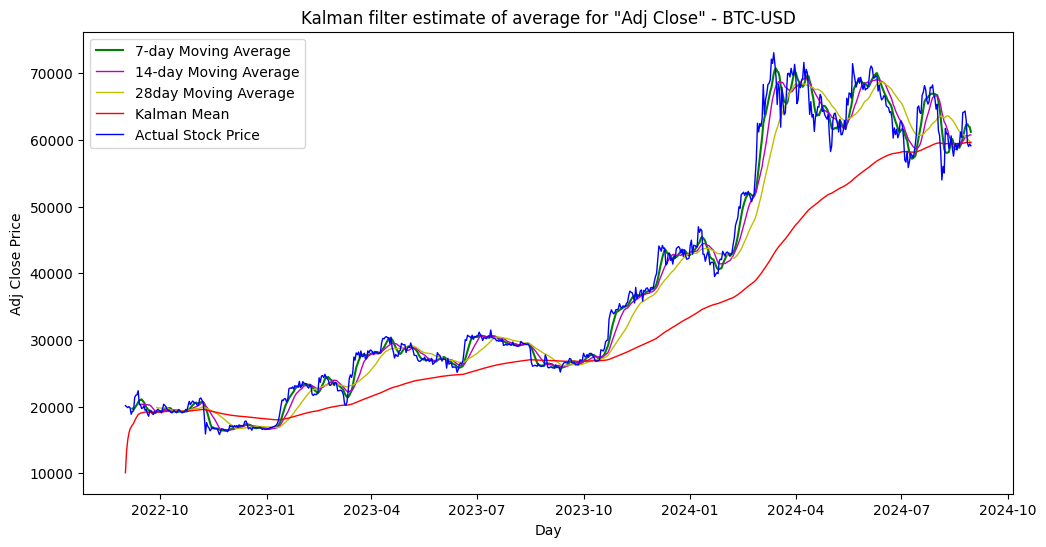

In [89]:
# using Kalman Filters for BTC-USD

stock_price = data['Adj Close']['BTC-USD']
mean, cov = kalmanFilter.filter(stock_price)
kalman_mean = pd.Series(mean.flatten(), index=stock_price.index)



rolling_3d = stock_price.rolling(window=3).mean()
rolling_7d = stock_price.rolling(window=7).mean()
rolling_14d = stock_price.rolling(window=14).mean()
rolling_28d = stock_price.rolling(window=28).mean()

plt.figure(figsize=(12,6))
plt.plot(rolling_7d,'-g',lw=1.5)
plt.plot(rolling_14d, 'm', lw=1)
plt.plot(rolling_28d, 'y', lw=1)
plt.plot(kalman_mean, 'r', lw=1)
plt.plot(stock_price, 'b', lw=1)
plt.title('Kalman filter estimate of average for "Adj Close" - BTC-USD')
plt.legend(['7-day Moving Average', '14-day Moving Average', '28day Moving Average', 'Kalman Mean', 'Actual Stock Price'])
plt.xlabel('Day')
plt.ylabel('Adj Close Price');

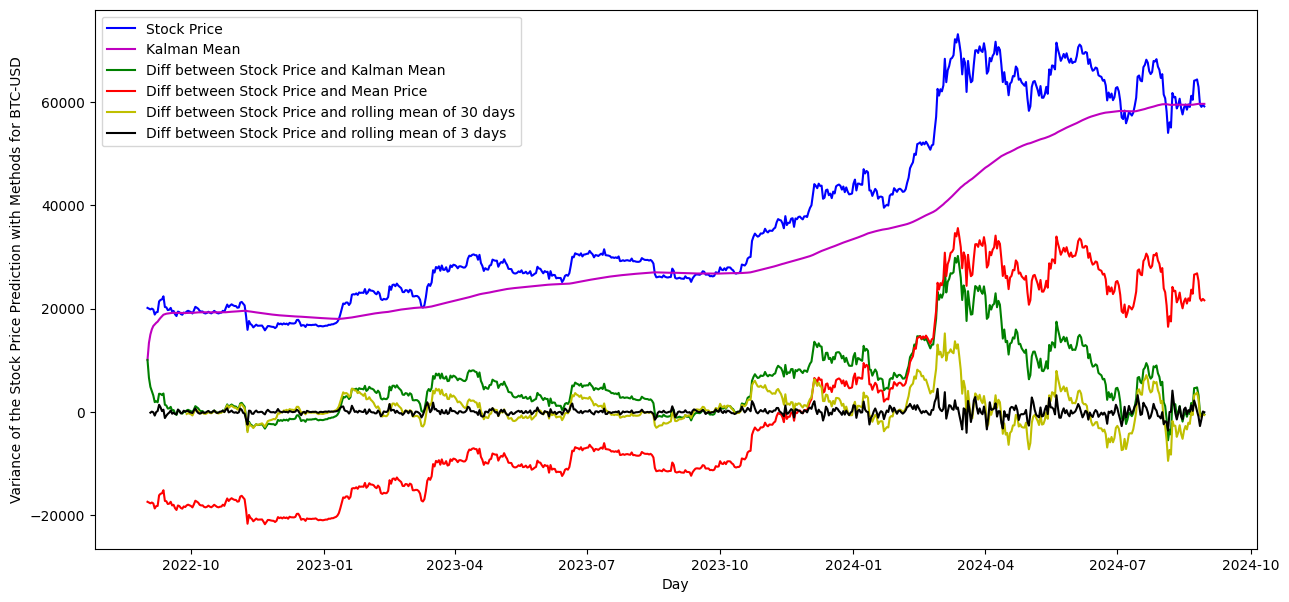

In [90]:
plt.figure(figsize=(15,7))
plt.plot(stock_price ,'b',lw=1.5)
plt.plot(kalman_mean ,'m',lw=1.5)
plt.plot(stock_price - kalman_mean,'-g',lw=1.5)
plt.plot(stock_price - stock_price.mean() ,'r',lw=1.5)
plt.plot(stock_price - rolling_28d ,'y',lw=1.5)
plt.plot(stock_price - rolling_3d ,'k',lw=1.5)
plt.legend(['Stock Price', 'Kalman Mean', 'Diff between Stock Price and Kalman Mean', 'Diff between Stock Price and Mean Price',
            'Diff between Stock Price and rolling mean of 30 days', 'Diff between Stock Price and rolling mean of 3 days'])
plt.xlabel('Day')
plt.ylabel('Variance of the Stock Price Prediction with Methods for BTC-USD');

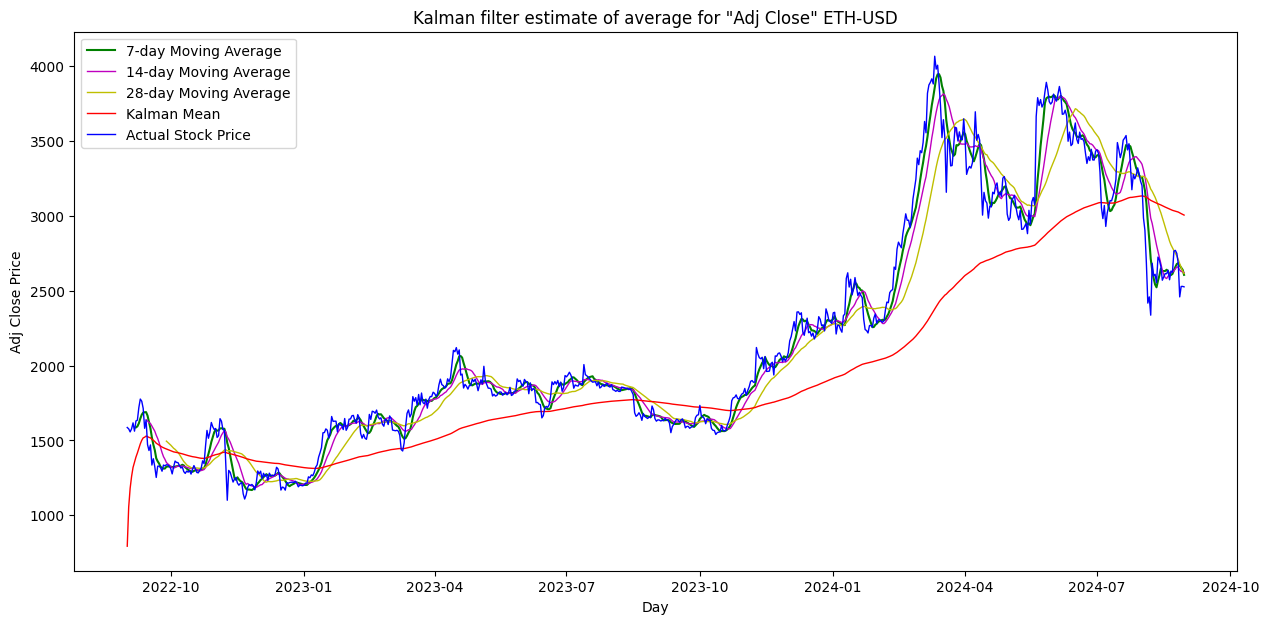

In [91]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

stock_price = data['Adj Close']['ETH-USD']
mean, cov = kalmanFilter.filter(stock_price)
kalman_mean = pd.Series(mean.flatten(), index=stock_price.index)



rolling_3d = stock_price.rolling(window=3).mean()
rolling_7d = stock_price.rolling(window=7).mean()
rolling_14d = stock_price.rolling(window=14).mean()
rolling_28d = stock_price.rolling(window=28).mean()

plt.figure(figsize=(15,7))
plt.plot(rolling_7d,'-g',lw=1.5)
plt.plot(rolling_14d, 'm', lw=1)
plt.plot(rolling_28d, 'y', lw=1)
plt.plot(kalman_mean, 'r', lw=1)
plt.plot(stock_price, 'b', lw=1)
plt.title('Kalman filter estimate of average for "Adj Close" ETH-USD')
plt.legend(['7-day Moving Average', '14-day Moving Average', '28-day Moving Average', 'Kalman Mean', 'Actual Stock Price'])
plt.xlabel('Day')
plt.ylabel('Adj Close Price');

From the kalman Filter for Bitcoin it can be seen that it produces much more smooth signal than others and is more generalised than the rolling window prediction. Kalman fiklter helps in separating the noise from the signals and can be used for prediction

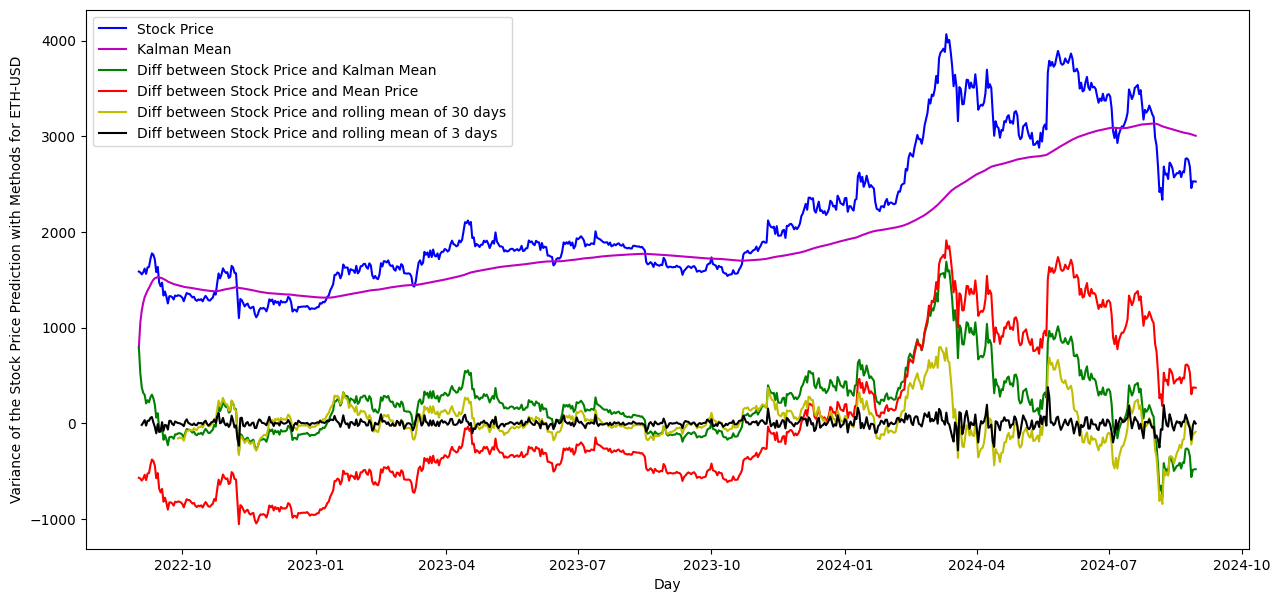

In [92]:
plt.figure(figsize=(15,7))
plt.plot(stock_price ,'b',lw=1.5)
plt.plot(kalman_mean ,'m',lw=1.5)
plt.plot(stock_price - kalman_mean,'-g',lw=1.5)
plt.plot(stock_price - stock_price.mean() ,'r',lw=1.5)
plt.plot(stock_price - rolling_28d ,'y',lw=1.5)
plt.plot(stock_price - rolling_3d ,'k',lw=1.5)

plt.legend(['Stock Price', 'Kalman Mean', 'Diff between Stock Price and Kalman Mean', 'Diff between Stock Price and Mean Price',  'Diff between Stock Price and rolling mean of 30 days',
            'Diff between Stock Price and rolling mean of 3 days'])
plt.xlabel('Day')
plt.ylabel('Variance of the Stock Price Prediction with Methods for ETH-USD');

Kalman Filters gives a time-evolving mean and shows fluctuations with time than the and difference stays closer to 0 compared to the other steps such as rolling mean and static mean. Such updated mean for each time point could help us manage aggressive trading strategies.

In the below section we will using Kalman Filter update method to do stock price forecasts for each day using the previous data as the prior and will keep on update the price on based on the daily available actual price like a dynamic system.

In the below Sections we will forecast Kalman Filter for **ETH-USD** data for various time intervals. We will be using Kalman Filter update on 'Adj Close' column of the time series.

<ipython-input-93-d5d7869a3599>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



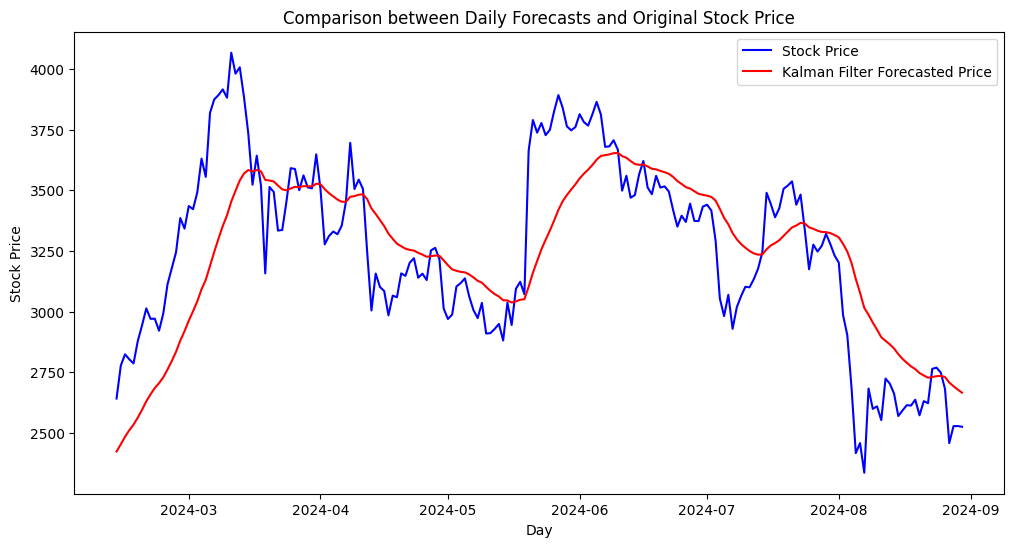

In [93]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)


# Predicting for ETH-USD
stock_price = data['Adj Close']['ETH-USD']

# Kalman Forecast for Next 100 days
mean, cov = kalmanFilter.em(stock_price[:-200], n_iter=10).smooth(stock_price[:-200]) # changed from 10 to 100, after experiment put it back to 10
# mean, cov = kalmanFilter.em(stock_price[1], n_iter=10)

next_means = []
next_covs = []
next_mean = mean[-1]
next_cov = cov[-1]
for i in range(200):
  next_mean, next_cov = kalmanFilter.filter_update(next_mean, next_cov, stock_price[-(200 - i * 1)]) # changed from 10 to 100, after experiment put it back to 10
  next_means.append(next_mean[0])
  next_covs.append(next_cov[0])


# replacing the forecasted price for the last 10 days
forecasted_price = pd.DataFrame(data=np.concatenate([stock_price[:-200].values, next_means]),
                  index=stock_price.index)

plt.figure(figsize=(12,6))
plt.plot(stock_price[len(stock_price)-200:] ,'b',lw=1.5)
plt.plot(forecasted_price[len(stock_price)-200:] ,'r',lw=1.5)
plt.legend(['Stock Price', 'Kalman Filter Forecasted Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price');

In [94]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

_y_stock = stock_price[len(stock_price)-200:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-200:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.5331947237800019
Mean absolute percentage error 0.06379022509833535
Root Mean Square Error RMSE 262.8734331675915
Mean absolute error 204.2497629668713


In [95]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)


# Predicting for ETH-USD
stock_price = data['Adj Close']['ETH-USD']

# Kalman Forecast for Next 100 days
mean, cov = kalmanFilter.em(stock_price[:-100], n_iter=10).smooth(stock_price[:-100]) # changed from 10 to 100, after experiment put it back to 10
# mean, cov = kalmanFilter.em(stock_price[1], n_iter=10)

next_means = []
next_covs = []
next_mean = mean[-1]
next_cov = cov[-1]
for i in range(100):
  next_mean, next_cov = kalmanFilter.filter_update(next_mean, next_cov, stock_price[-(100 - i * 1)]) # changed from 10 to 100, after experiment put it back to 10
  next_means.append(next_mean[0])
  next_covs.append(next_cov[0])

<ipython-input-95-968bb0fc92b6>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



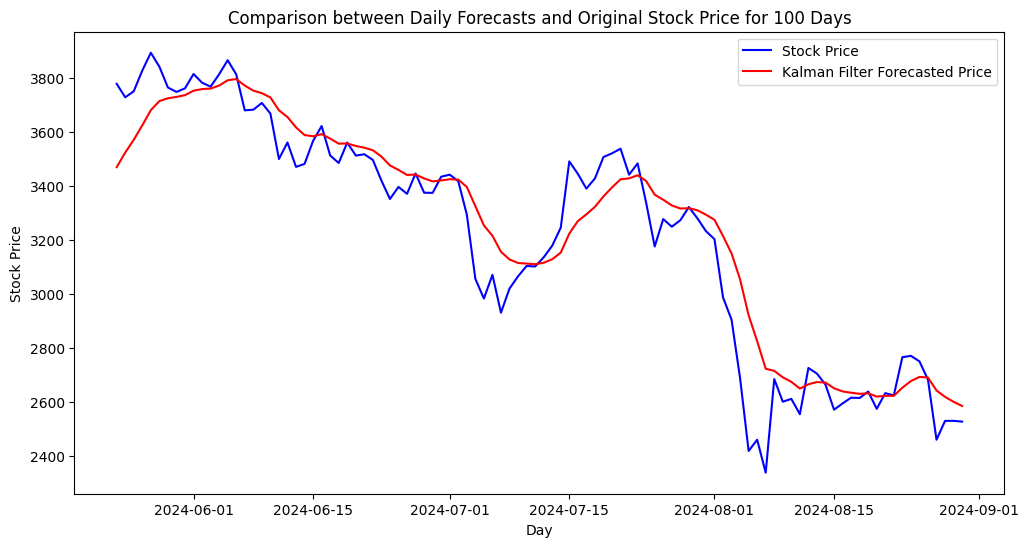

In [96]:
# replacing the forecasted price for the last 10 days
forecasted_price = pd.DataFrame(data=np.concatenate([stock_price[:-100].values, next_means]),
                  index=stock_price.index)

plt.figure(figsize=(12,6))
plt.plot(stock_price[len(stock_price)-100:] ,'b',lw=1.5)
plt.plot(forecasted_price[len(stock_price)-100:] ,'r',lw=1.5)
plt.legend(['Stock Price', 'Kalman Filter Forecasted Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price for 100 Days');

In [97]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

_y_stock = stock_price[len(stock_price)-100:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-100:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9041106970476439
Mean absolute percentage error 0.031062199149145875
Root Mean Square Error RMSE 134.7597223756434
Mean absolute error 95.2399569958813


<ipython-input-98-70c97d46fae8>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



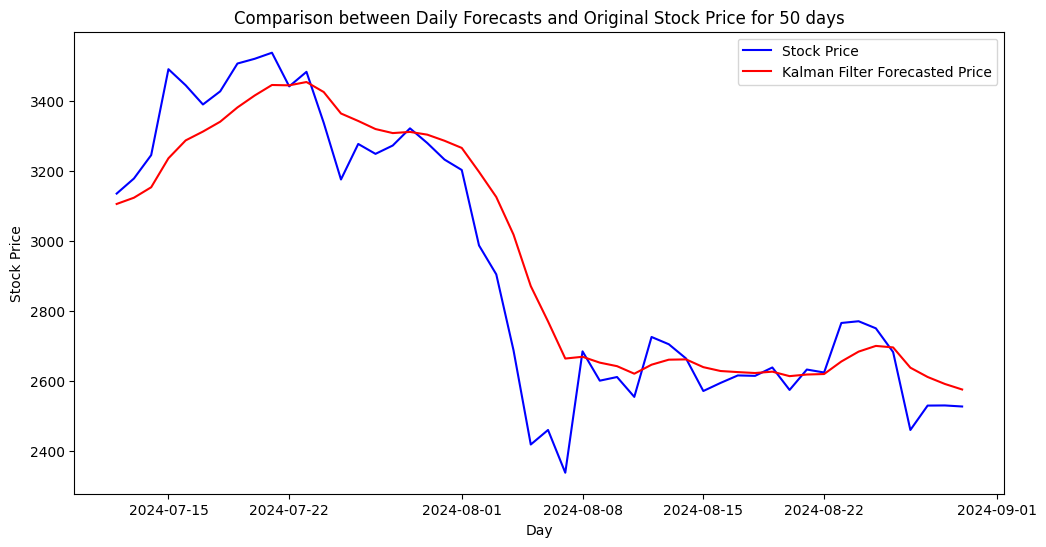

In [98]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)


# Predicting for ETH-USD
stock_price = data['Adj Close']['ETH-USD']

# Kalman Forecast for Next 100 days
mean, cov = kalmanFilter.em(stock_price[:-50], n_iter=10).smooth(stock_price[:-50]) # changed from 10 to 100, after experiment put it back to 10
# mean, cov = kalmanFilter.em(stock_price[1], n_iter=10)

next_means = []
next_covs = []
next_mean = mean[-1]
next_cov = cov[-1]
for i in range(50):
  next_mean, next_cov = kalmanFilter.filter_update(next_mean, next_cov, stock_price[-(50 - i * 1)]) # changed from 10 to 100, after experiment put it back to 10
  next_means.append(next_mean[0])
  next_covs.append(next_cov[0])


# replacing the forecasted price for the last 10 days
forecasted_price = pd.DataFrame(data=np.concatenate([stock_price[:-50].values, next_means]),
                  index=stock_price.index)

plt.figure(figsize=(12,6))
plt.plot(stock_price[len(stock_price)-50:] ,'b',lw=1.5)
plt.plot(forecasted_price[len(stock_price)-50:] ,'r',lw=1.5)
plt.legend(['Stock Price', 'Kalman Filter Forecasted Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price for 50 days');

In [99]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

_y_stock = stock_price[len(stock_price)-50:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-50:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.8698406878436127
Mean absolute percentage error 0.033123361785285604
Root Mean Square Error RMSE 135.19253245722786
Mean absolute error 93.34666907382754


<ipython-input-100-312e22bc3bd5>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



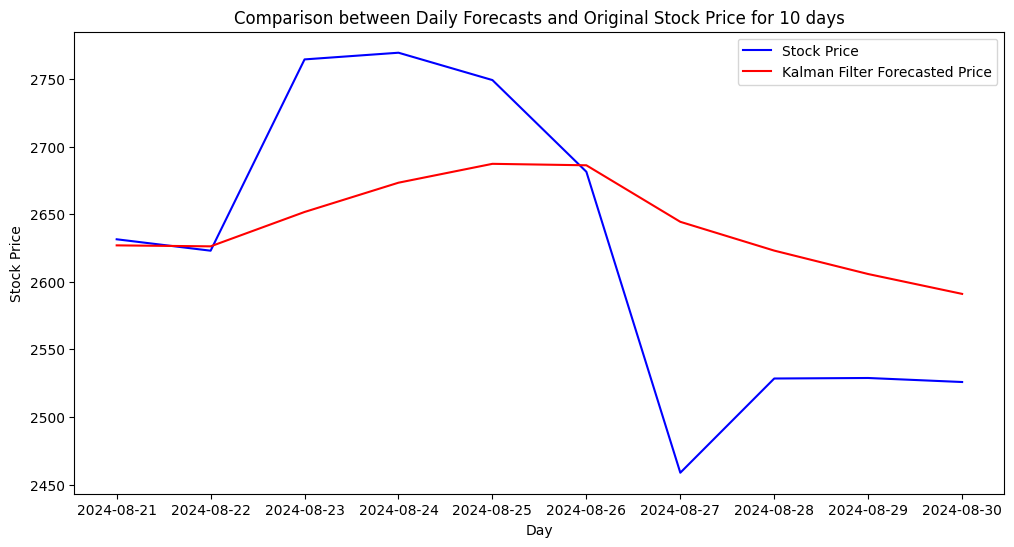

In [100]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)


# Predicting for ETH-USD
stock_price = data['Adj Close']['ETH-USD']

# Kalman Forecast for Next 100 days
mean, cov = kalmanFilter.em(stock_price[:-10], n_iter=10).smooth(stock_price[:-10]) # changed from 10 to 100, after experiment put it back to 10
# mean, cov = kalmanFilter.em(stock_price[1], n_iter=10)

next_means = []
next_covs = []
next_mean = mean[-1]
next_cov = cov[-1]
for i in range(10):
  next_mean, next_cov = kalmanFilter.filter_update(next_mean, next_cov, stock_price[-(10 - i * 1)]) # changed from 10 to 100, after experiment put it back to 10
  next_means.append(next_mean[0])
  next_covs.append(next_cov[0])


# replacing the forecasted price for the last 10 days
forecasted_price = pd.DataFrame(data=np.concatenate([stock_price[:-10].values, next_means]),
                  index=stock_price.index)

plt.figure(figsize=(12,6))
plt.plot(stock_price[len(stock_price)-10:] ,'b',lw=1.5)
plt.plot(forecasted_price[len(stock_price)-10:] ,'r',lw=1.5)
plt.legend(['Stock Price', 'Kalman Filter Forecasted Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price for 10 days');

In [101]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

_y_stock = stock_price[len(stock_price)-10:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-10:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.30926748192137554
Mean absolute percentage error 0.027190416741025812
Root Mean Square Error RMSE 89.12006435805553
Mean absolute error 70.57116342951144


# **Using Traditional ML for Prediction**

In this section we will explore how traditional methods work for stock price prediction. We will be using multivariable regression technique to predict closing price of the stock for the next day. The feature engineering for this model will include column values high, low, open, close, volume to determine the Adjusted close price for the next day.

In [102]:
data.head()

Price                         Adj Close                      Close  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  20127.140625  1586.176758  20127.140625   
2022-09-02 00:00:00+00:00  19969.771484  1577.220459  19969.771484   
2022-09-03 00:00:00+00:00  19832.087891  1556.872681  19832.087891   
2022-09-04 00:00:00+00:00  19986.712891  1577.641602  19986.712891   
2022-09-05 00:00:00+00:00  19812.371094  1617.183228  19812.371094   

Price                                           High               \
Ticker                         ETH-USD       BTC-USD      ETH-USD   
Date                                                                
2022-09-01 00:00:00+00:00  1586.176758  20198.390625  1593.082764   
2022-09-02 00:00:00+00:00  1577.220459  20401.568359  1643.183228   
2022-09-03 00:00:00+00:00  1556.872681  20037.009766  1579.454346   
2022-09-04 00:00:00+00:00  1577.641602  19999.689453  1578.009277   
2022-09-05 00:00:00+00:00  1617.183228  20031.160156  1621.661377   

Price                               Low                       Open  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  19653.968750  1520.188354  20050.498047   
2022-09-02 00:00:00+00:00  19814.765625  1551.877930  20126.072266   
2022-09-03 00:00:00+00:00  19698.355469  1541.672119  19969.718750   
2022-09-04 00:00:00+00:00  19636.816406  1543.698853  19832.470703   
2022-09-05 00:00:00+00:00  19673.046875  1559.781860  19988.789062   

Price                                        Volume               
Ticker                         ETH-USD      BTC-USD      ETH-USD  
Date                                                              
2022-09-01 00:00:00+00:00  1553.756348  30182031010  16434276817  
2022-09-02 00:00:00+00:00  1586.017944  29123998928  17708478709  
2022-09-03 00:00:00+00:00  1577.213745  23613051457   9516825994  
2022-09-04 00:00:00+00:00  1556.895874  25245861652   8884144998  
2022-09-05 00:00:00+00:00  1577.884033  28813460025  13060541168

In [103]:
btc_data = {'Open': data['Open']['BTC-USD'],
            'Close': data['Close']['BTC-USD'],
            'High': data['High']['BTC-USD'],
            'Low': data['Low']['BTC-USD'],
            'Volume': data['Low']['BTC-USD'],
            'Adj Close': data['Adj Close']['BTC-USD']
            }

eth_data = {'Open': data['Open']['ETH-USD'],
            'Close': data['Close']['ETH-USD'],
            'High': data['High']['ETH-USD'],
            'Low': data['Low']['ETH-USD'],
            'Volume': data['Low']['ETH-USD'],
            'Adj Close': data['Adj Close']['ETH-USD']
            }

btc_df = pd.DataFrame(btc_data, columns = ['Open', 'Close', 'High', 'Low', 'Volume', 'Adj Close'])
eth_df = pd.DataFrame(eth_data, columns = ['Open', 'Close', 'High', 'Low', 'Volume', 'Adj Close'])

In [104]:
eth_df.head()

,Open,Close,High,Low,Volume,Adj Close
Date,,,,,,
2022-09-01 00:00:00+00:00,1553.756348,1586.176758,1593.082764,1520.188354,1520.188354,1586.176758
2022-09-02 00:00:00+00:00,1586.017944,1577.220459,1643.183228,1551.877930,1551.877930,1577.220459
2022-09-03 00:00:00+00:00,1577.213745,1556.872681,1579.454346,1541.672119,1541.672119,1556.872681
2022-09-04 00:00:00+00:00,1556.895874,1577.641602,1578.009277,1543.698853,1543.698853,1577.641602
2022-09-05 00:00:00+00:00,1577.884033,1617.183228,1621.661377,1559.781860,1559.781860,1617.183228


In [105]:
eth_df.describe()

,Open,Close,High,Low,Volume,Adj Close
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2153.339377,2154.649833,2197.880829,2107.257615,2107.257615,2154.649833
std,761.057358,760.858790,781.196683,736.665024,736.665024,760.858790
min,1100.107178,1100.169800,1136.442627,1081.138184,1081.138184,1100.169800
25%,1617.854645,1620.496521,1644.864014,1580.678528,1580.678528,1620.496521
50%,1865.844604,1866.100159,1887.949524,1845.784241,1845.784241,1866.100159
75%,2640.590576,2640.965576,2709.429199,2585.498413,2585.498413,2640.965576
max,4066.690430,4066.445068,4092.284180,3936.627197,3936.627197,4066.445068


In [106]:
btc_df.describe()

,Open,Close,High,Low,Volume,Adj Close
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,37464.146091,37518.319863,38162.137949,36780.942348,36780.942348,37518.319863
std,17678.426052,17685.270401,18083.910703,17220.739292,17220.739292,17685.270401
min,15782.300781,15787.284180,16253.047852,15599.046875,15599.046875,15787.284180
25%,23627.717285,23665.855469,24119.581543,23253.754883,23253.754883,23665.855469
50%,29403.917969,29412.204102,29845.836914,29113.966797,29113.966797,29412.204102
75%,55644.687500,55988.014648,57679.622070,54234.083008,54234.083008,55988.014648
max,73079.375000,73083.500000,73750.070312,71334.093750,71334.093750,73083.500000


In [107]:
btc_df.head()

,Open,Close,High,Low,Volume,Adj Close
Date,,,,,,
2022-09-01 00:00:00+00:00,20050.498047,20127.140625,20198.390625,19653.968750,19653.968750,20127.140625
2022-09-02 00:00:00+00:00,20126.072266,19969.771484,20401.568359,19814.765625,19814.765625,19969.771484
2022-09-03 00:00:00+00:00,19969.718750,19832.087891,20037.009766,19698.355469,19698.355469,19832.087891
2022-09-04 00:00:00+00:00,19832.470703,19986.712891,19999.689453,19636.816406,19636.816406,19986.712891
2022-09-05 00:00:00+00:00,19988.789062,19812.371094,20031.160156,19673.046875,19673.046875,19812.371094


In [108]:
eth_df['Target'] = eth_df['Adj Close'].shift(-1)
eth_df.dropna(inplace=True)
eth_df.head()

,Open,Close,High,Low,Volume,Adj Close,Target
Date,,,,,,,
2022-09-01 00:00:00+00:00,1553.756348,1586.176758,1593.082764,1520.188354,1520.188354,1586.176758,1577.220459
2022-09-02 00:00:00+00:00,1586.017944,1577.220459,1643.183228,1551.877930,1551.877930,1577.220459,1556.872681
2022-09-03 00:00:00+00:00,1577.213745,1556.872681,1579.454346,1541.672119,1541.672119,1556.872681,1577.641602
2022-09-04 00:00:00+00:00,1556.895874,1577.641602,1578.009277,1543.698853,1543.698853,1577.641602,1617.183228
2022-09-05 00:00:00+00:00,1577.884033,1617.183228,1621.661377,1559.781860,1559.781860,1617.183228,1561.748535


In [109]:
eth_df.tail()

,Open,Close,High,Low,Volume,Adj Close,Target
Date,,,,,,,
2024-08-25 00:00:00+00:00,2769.098145,2749.157715,2793.012939,2736.088867,2736.088867,2749.157715,2681.340576
2024-08-26 00:00:00+00:00,2749.247559,2681.340576,2763.004150,2668.886719,2668.886719,2681.340576,2458.726562
2024-08-27 00:00:00+00:00,2681.622803,2458.726562,2700.152832,2401.175049,2401.175049,2458.726562,2528.415527
2024-08-28 00:00:00+00:00,2458.904785,2528.415527,2553.820068,2422.293701,2422.293701,2528.415527,2528.792725
2024-08-29 00:00:00+00:00,2528.362305,2528.792725,2595.977051,2507.502441,2507.502441,2528.792725,2525.822021


We can define as the forecast set for the last 10 data points to compare with our Kalman Forecast.

In [110]:
forecast_set = eth_df[-200:] # validation set
training_set = eth_df[:-200] # changed from 10 to 100, after experiment put it back to 10

In [111]:
forecast_set

,Open,Close,High,Low,Volume,Adj Close,Target
Date,,,,,,,
2024-02-12 00:00:00+00:00,2507.578857,2658.115967,2663.842773,2473.812012,2473.812012,2658.115967,2642.185303
2024-02-13 00:00:00+00:00,2659.586182,2642.185303,2686.455078,2599.169434,2599.169434,2642.185303,2777.902344
2024-02-14 00:00:00+00:00,2641.685303,2777.902344,2786.893555,2621.025391,2621.025391,2777.902344,2824.378906
2024-02-15 00:00:00+00:00,2777.601318,2824.378906,2865.845459,2764.010498,2764.010498,2824.378906,2803.691406
2024-02-16 00:00:00+00:00,2825.480713,2803.691406,2858.450439,2760.331055,2760.331055,2803.691406,2786.672607
...,...,...,...,...,...,...,...
2024-08-25 00:00:00+00:00,2769.098145,2749.157715,2793.012939,2736.088867,2736.088867,2749.157715,2681.340576
2024-08-26 00:00:00+00:00,2749.247559,2681.340576,2763.004150,2668.886719,2668.886719,2681.340576,2458.726562
2024-08-27 00:00:00+00:00,2681.622803,2458.726562,2700.152832,2401.175049,2401.175049,2458.726562,2528.415527


In [112]:
# len(X_test)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

X = training_set.drop('Target', axis=1)
y = training_set['Target']


# calling pre-processing for scaling or standardization of the X values
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)
print('The linear regression confidence is {}'.format(score))

The linear regression confidence is 0.8901272092118377


In [114]:
prediction = lr.predict(X_test[:100])

# from sklearn.metrics import r2_score , mean_absolute_percentage_error
# print("R square {}".format(r2_score(y_test, prediction)))
# print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(y_test, prediction)))

In [115]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

print("R square {}".format(r2_score(y_test[:100], prediction)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(y_test[:100], prediction)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(y_test[:100], prediction))))
print("Mean absolute error {}".format(mean_absolute_error(y_test[:100], prediction)))

R square 0.8852723302985438
Mean absolute percentage error 0.020247466438748578
Root Mean Square Error RMSE 64.68978629963057
Mean absolute error 45.34421937020249


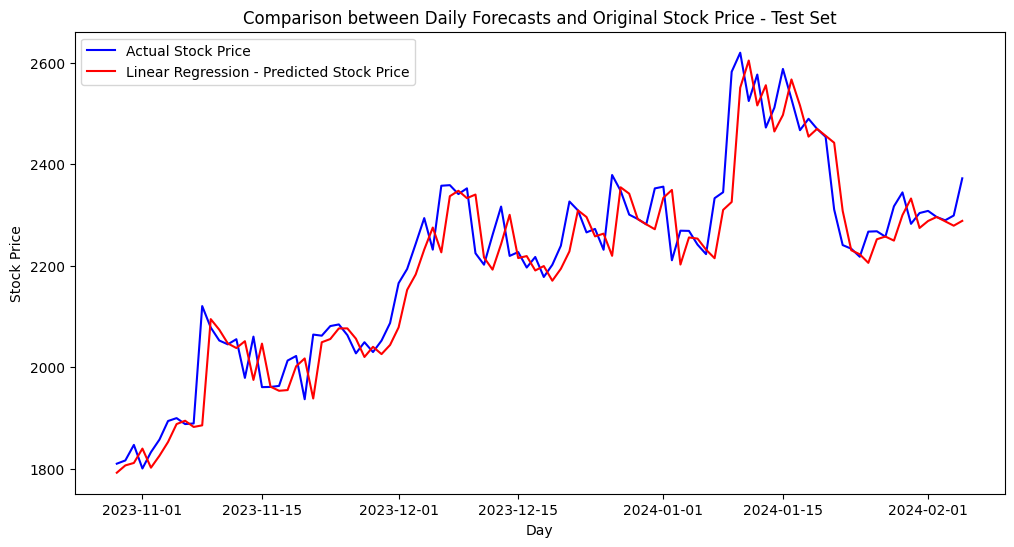

In [116]:
plt.figure(figsize=(12,6))
plt.plot(y_test[:100] ,'b',lw=1.5)
plt.plot(pd.DataFrame(data=prediction, index=y_test[:100].index) ,'r',lw=1.5)
plt.legend(['Actual Stock Price', 'Linear Regression - Predicted Stock Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price - Test Set');

In [117]:
prediction = lr.predict(X_test[:50])
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

print("R square {}".format(r2_score(y_test[:50], prediction)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(y_test[:50], prediction)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(y_test[:50], prediction))))
print("Mean absolute error {}".format(mean_absolute_error(y_test[:50], prediction)))

R square 0.8508220091574861
Mean absolute percentage error 0.02041025364721451
Root Mean Square Error RMSE 60.52601272456529
Mean absolute error 42.913583621540994


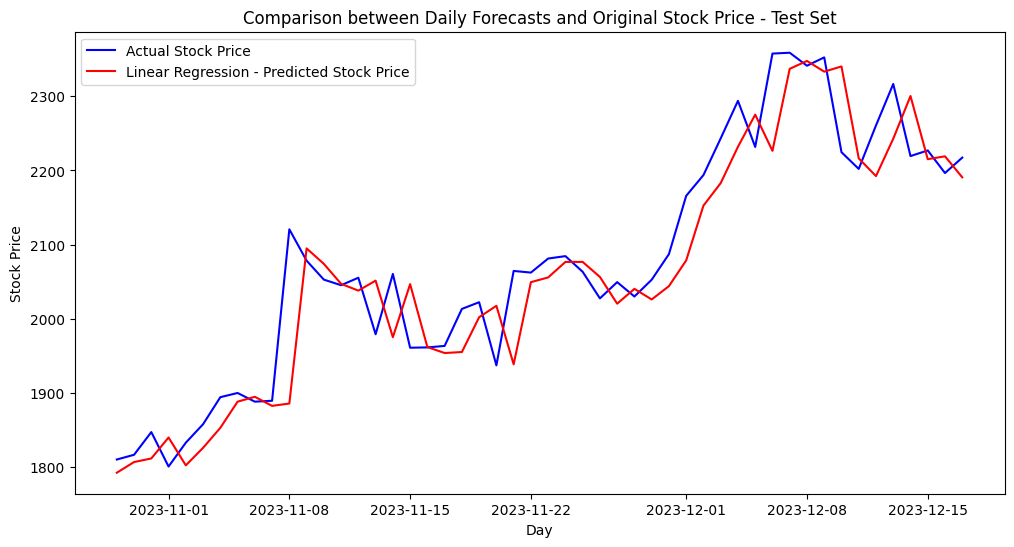

In [118]:
plt.figure(figsize=(12,6))
plt.plot(y_test[:50] ,'b',lw=1.5)
plt.plot(pd.DataFrame(data=prediction, index=y_test[:50].index) ,'r',lw=1.5)
plt.legend(['Actual Stock Price', 'Linear Regression - Predicted Stock Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price - Test Set');

In [119]:
prediction = lr.predict(X_test[:10])
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

print("R square {}".format(r2_score(y_test[:10], prediction)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(y_test[:10], prediction)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(y_test[:10], prediction))))
print("Mean absolute error {}".format(mean_absolute_error(y_test[:10], prediction)))

R square 0.4464668178124982
Mean absolute percentage error 0.012516394619436188
Root Mean Square Error RMSE 26.64129516909742
Mean absolute error 23.124079376954207


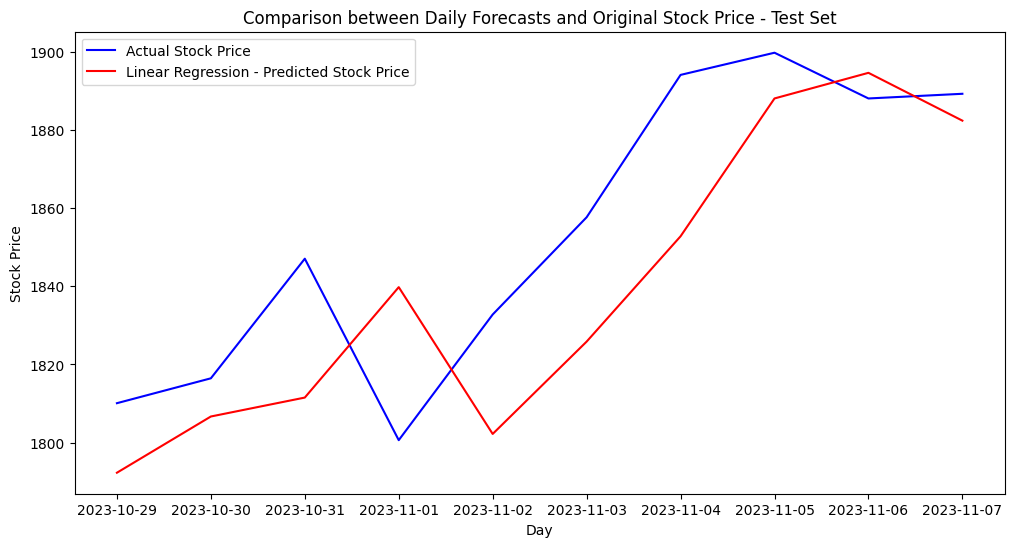

In [120]:
plt.figure(figsize=(12,6))
plt.plot(y_test[:10] ,'b',lw=1.5)
plt.plot(pd.DataFrame(data=prediction, index=y_test[:10].index) ,'r',lw=1.5)
plt.legend(['Actual Stock Price', 'Linear Regression - Predicted Stock Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price - Test Set');

In [121]:
# We will not forecast for the next days based on this model
forecast_X = forecast_set.drop('Target', axis=1)
forecast_y = forecast_set['Target']
forecast_pred = lr.predict(preprocessing.scale(forecast_X))
forecast_pred

array([1217.91571333, 1216.1973982 , 1322.02023933, 1370.38365189,
       1354.01390365, 1335.68814119, 1411.43525403, 1469.86042295,
       1523.72327363, 1490.37171101, 1495.12993538, 1457.19613254,
       1509.49103753, 1608.42146148, 1663.69507854, 1726.4507585 ,
       1842.10495806, 1819.31722747, 1885.72513323, 1880.2195351 ,
       1929.57281682, 2044.33892688, 1981.11571383, 2200.08262905,
       2257.88224042, 2281.10149117, 2298.90060741, 2268.37202312,
       2404.52098619, 2347.55004232, 2375.99336318, 2264.35578722,
       2142.2916627 , 1974.17046562, 2051.91177114, 1962.26772122,
       1673.80850231, 1926.04722158, 1939.10137169, 1809.04417871,
       1808.22907973, 1897.52621746, 2015.49548376, 2022.81446159,
       1952.10872937, 1994.23539975, 1957.02888573, 1955.11849923,
       2062.61473059, 1950.07988573, 1762.85193517, 1781.18522494,
       1802.83978859, 1784.97151683, 1821.82626384, 1899.48239066,
       2093.80131211, 1957.44444349, 1974.22140874, 1954.81716

In [122]:
forecast_y

,Target
Date,
2024-02-12 00:00:00+00:00,2642.185303
2024-02-13 00:00:00+00:00,2777.902344
2024-02-14 00:00:00+00:00,2824.378906
2024-02-15 00:00:00+00:00,2803.691406
2024-02-16 00:00:00+00:00,2786.672607
...,...
2024-08-25 00:00:00+00:00,2681.340576
2024-08-26 00:00:00+00:00,2458.726562
2024-08-27 00:00:00+00:00,2528.415527


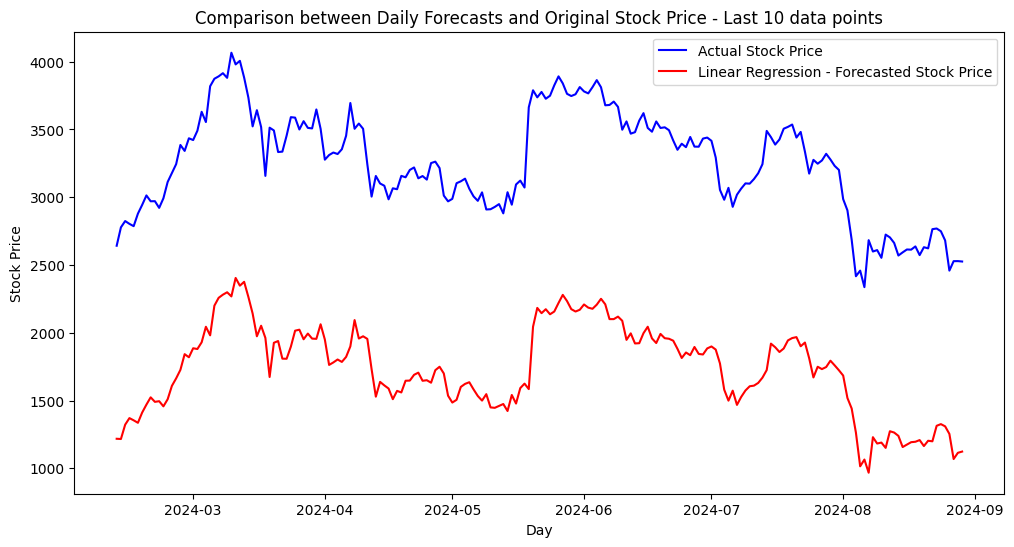

In [123]:
plt.figure(figsize=(12,6))
plt.plot(forecast_y ,'b',lw=1.5)
plt.plot(pd.DataFrame(data=forecast_pred, index=forecast_y.index) ,'r',lw=1.5)
plt.legend(['Actual Stock Price', 'Linear Regression - Forecasted Stock Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price - Last 10 data points');

Metrics from LR for the stock price

In [124]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import math

print("R square {}".format(r2_score(forecast_y, forecast_pred)))
print("Mean absolute percentage error {}".format(mean_absolute_percentage_error(forecast_y, forecast_pred)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(forecast_y, forecast_pred))))
print("Mean absolute error {}".format(mean_absolute_error(forecast_y, forecast_pred)))

R square -14.678373150650259
Mean absolute percentage error 0.470722951756699
Root Mean Square Error RMSE 1523.4539014820086
Mean absolute error 1518.8060010609427


Metrics from the Kalman Filter forecast

In [125]:
_y_stock = stock_price[len(stock_price)-2000:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-2000:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9998118018583926
Mean absolute percentage error MAPE 0.00037247146220583305
Root Mean Square Error RMSE 10.430714570659806
Mean absolute error MAE 0.966728266157691


In [126]:
_y_stock = stock_price[len(stock_price)-500:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-500:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9996946969956958
Mean absolute percentage error MAPE 0.0005438083348205162
Root Mean Square Error RMSE 12.60348036947252
Mean absolute error MAE 1.4114232685902288


In [127]:
_y_stock = stock_price[len(stock_price)-200:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-200:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9973173541119791
Mean absolute percentage error MAPE 0.0013595208370512906
Root Mean Square Error RMSE 19.92785220637683
Mean absolute error MAE 3.5285581714755723


In [128]:
_y_stock = stock_price[len(stock_price)-100:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-100:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9958062655293043
Mean absolute percentage error MAPE 0.0027190416741025808
Root Mean Square Error RMSE 28.182238859224718
Mean absolute error MAE 7.0571163429511445


In [129]:
_y_stock = stock_price[len(stock_price)-50:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-50:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.9886877025379025
Mean absolute percentage error MAPE 0.005438083348205162
Root Mean Square Error RMSE 39.85570441275366
Mean absolute error MAE 14.114232685902289


In [130]:
_y_stock = stock_price[len(stock_price)-10:] # changed from 10 to 100, after experiment put it back to 10
kalman_forecast_y = forecasted_price[len(stock_price)-10:] # changed from 10 to 100, after experiment put it back to 10
print("R square {}".format(r2_score(_y_stock, kalman_forecast_y)))
print("Mean absolute percentage error MAPE {}".format(mean_absolute_percentage_error(_y_stock, kalman_forecast_y)))
print("Root Mean Square Error RMSE {}".format(math.sqrt(mean_squared_error(_y_stock, kalman_forecast_y))))
print("Mean absolute error MAE {}".format(mean_absolute_error(_y_stock, kalman_forecast_y)))

R square 0.30926748192137554
Mean absolute percentage error MAPE 0.027190416741025812
Root Mean Square Error RMSE 89.12006435805553
Mean absolute error MAE 70.57116342951144
